<a href="https://colab.research.google.com/github/feliperromao/datascience-na-pratica/blob/main/An%C3%A1lise_de_dados_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-03-21/visualisations/listings.csv")

In [65]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,200,5,260,2021-02-08,2.00,1,334
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,37
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,275,2,181,2020-03-15,2.00,1,236
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,120,3,356,2021-03-06,2.79,1,120
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,494,3,18,2016-02-09,0.18,2,365


In [66]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

print(df.dtypes)

Entradas:	 26628
Variáveis:	 16

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [67]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.373329
last_review                       0.373329
host_name                         0.027039
name                              0.001089
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbc1916c50>,
      dtype=object)

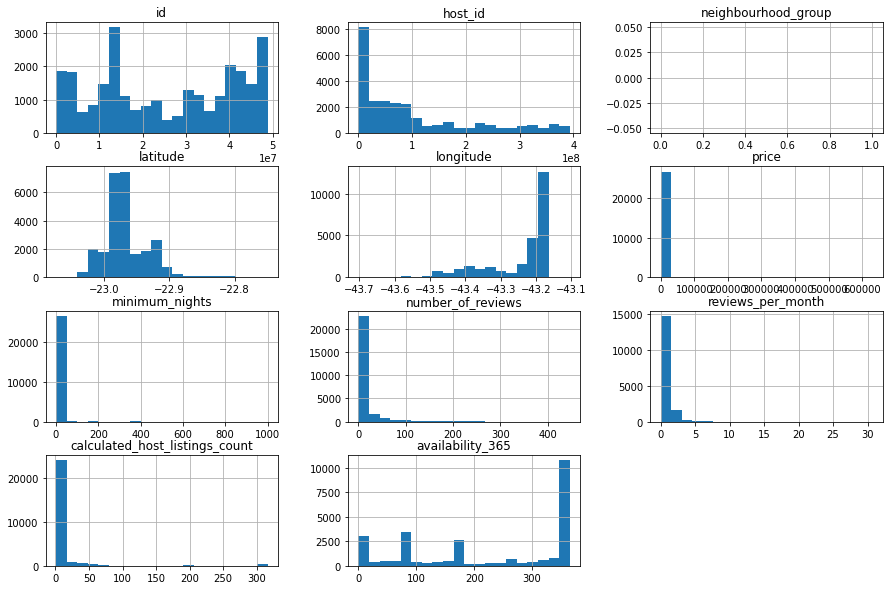

In [68]:
df.hist(bins=20, figsize=(15,10))

## Q4. Há outliers presentes?

In [69]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,26628.000000,26628.000000,26628.000000,16687.000000,26628.000000,26628.000000
mean,749.774148,4.749624,12.219543,0.611649,10.021481,226.596853
std,5636.368450,19.116195,29.876552,0.860417,38.697792,138.216789
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.090000,1.000000,89.000000
50%,264.000000,2.000000,2.000000,0.270000,1.000000,266.000000
75%,536.000000,4.000000,9.000000,0.810000,3.000000,364.000000
max,629236.000000,1000.000000,447.000000,30.650000,316.000000,365.000000


In [70]:
normalized_df = df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]

### Boxplot para `minimum_nights`

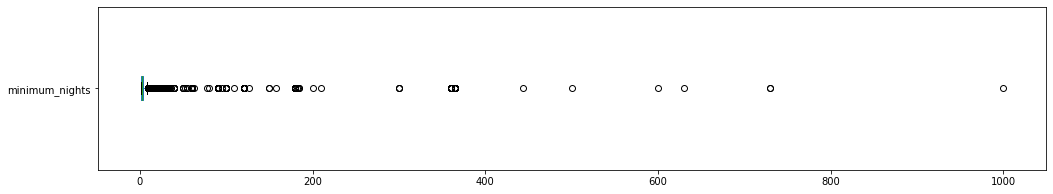

minimum_nights: valores acima de 30:
213 entradas
0.7999%


In [71]:
df.minimum_nights.plot(kind="box", vert=False, figsize=(17,3))
plt.show()


# Ver quantidade de valores acima de 30
entries_minimum_nights = len(df[df.minimum_nights > 30])
percent_minimum_nights = len(df[df.minimum_nights > 30]) / df.shape[0] * 100
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(entries_minimum_nights))
print("{:.4f}%".format(percent_minimum_nights))

### Boxplot para `price`

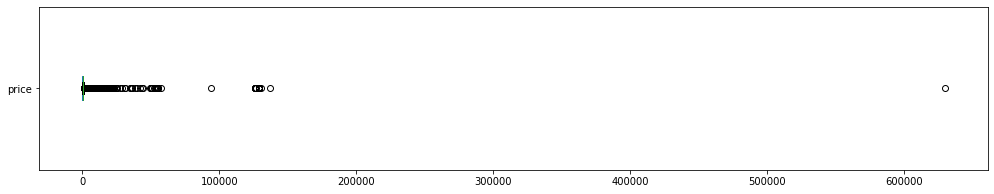

price: valores acima de 1500:
1774 entradas
6.6622%


In [72]:
df.price.plot(kind="box", vert=False, figsize=(17,3))
plt.show()

# Ver quantidade de valores acima de 1500
entries_price = len(df[df.price > 1500])
percent_price = len(df[df.price > 1500]) / df.shape[0] * 100
print("price: valores acima de 1500:")
print("{} entradas".format(entries_price))
print("{:.4f}%".format(percent_price))

### Histogramas sem outliers
- Cria uma copia do dataframe
- Exclui registros cujo os valores de price são maiores que 1500
- remove o `neighbourhood_group` pois esta vazio


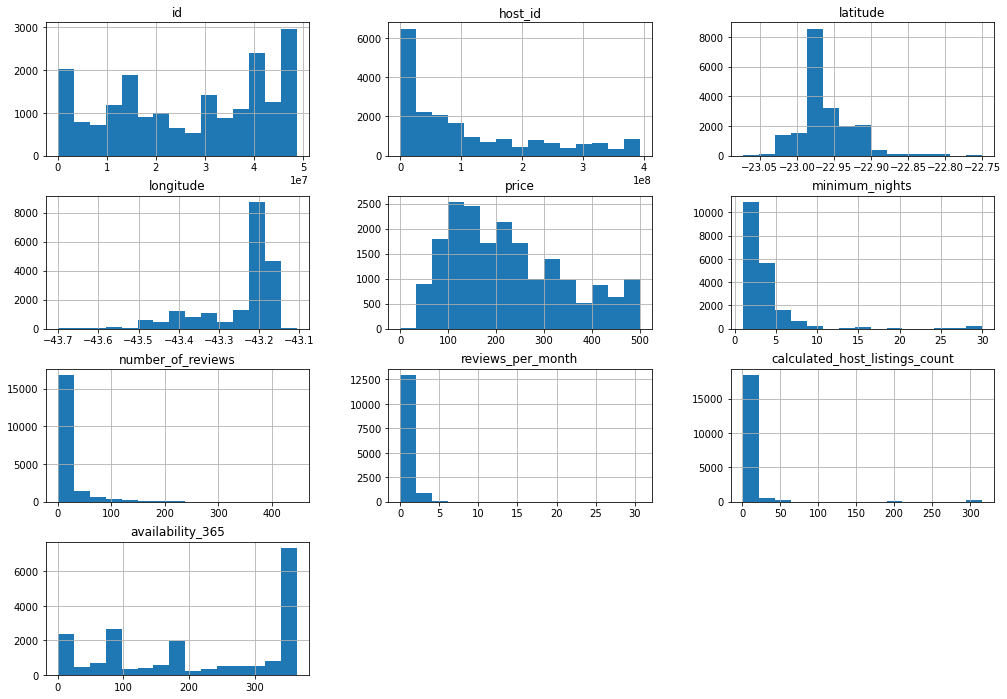

In [73]:

# Cria uma copia do dataframe
df_clean = df.copy()

# Exclui registros cujo os valores de price são maiores que 500
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remove o `neighbourhood_group` pois esta vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

df_clean.hist(bins=15, figsize=(17,12))
plt.show()

## Verificando a correlação entre os dados

In [74]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.022802,-0.111782,-0.146365,0.087320,0.028821
minimum_nights,0.022802,1.000000,-0.042035,-0.095132,-0.064915,-0.038354
number_of_reviews,-0.111782,-0.042035,1.000000,0.596050,-0.060264,-0.063029
reviews_per_month,-0.146365,-0.095132,0.596050,1.000000,0.004780,-0.124255
calculated_host_listings_count,0.087320,-0.064915,-0.060264,0.004780,1.000000,0.015137
availability_365,0.028821,-0.038354,-0.063029,-0.124255,0.015137,1.000000


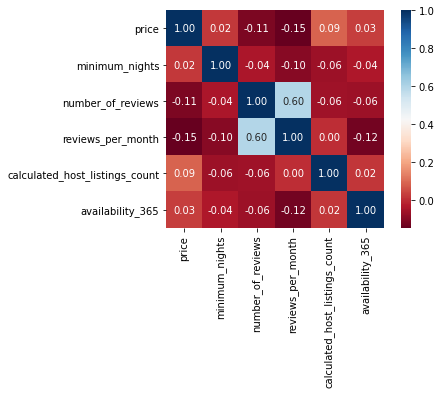

In [75]:
sns.heatmap(corr, cmap="RdBu", fmt='.2f',square=True, linecolor='white', annot=True)

## Tipo de imóvel mais alugado no Airbnb

In [76]:
# Quantidade
df_clean.room_type.value_counts()

# Percentual
df_clean.room_type.value_counts(normalize=True).map('{:.1%}'.format)

Entire home/apt    66.8%
Private room       29.9%
Shared room         2.8%
Hotel room          0.4%
Name: room_type, dtype: object

## Localizade mais cara do Rio

In [77]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Manguinhos           420.000000
Cavalcanti           350.000000
Osvaldo Cruz         344.500000
Paciência            338.833333
Leblon               313.294766
Vaz Lobo             300.000000
Pavuna               290.000000
Lagoa                286.553333
Ipanema              275.817274
Engenho da Rainha    269.500000
Name: price, dtype: float64

In [81]:
df[df.neighbourhood == "Manguinhos"].shape

(2, 16)

In [79]:
df_clean.groupby(['neighbourhood']).size().sort_values(ascending=False)

neighbourhood
Copacabana          6145
Ipanema             1702
Barra da Tijuca     1678
Botafogo             981
Jacarepaguá          892
                    ... 
Grumari                1
Gericinó               1
Cavalcanti             1
Freguesia (Ilha)       1
Água Santa             1
Length: 149, dtype: int64

## Plotar imóveis pela latitude-longitude

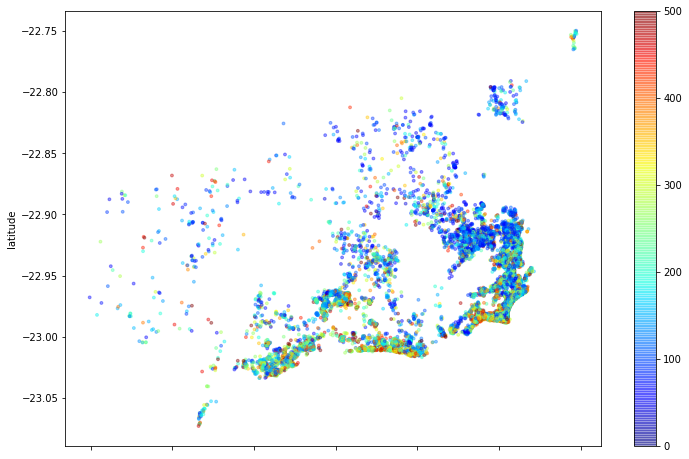

In [80]:
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))